
## **HW Assignment-5**

This is a Predictive Analytics Homework, please answer the questions and fill the functions only with using python.

In this assignment, you are going to practice your exploratory data analysis skills. Each question is accompanied by an incomplete function. Your task is to construct the body of those functions with appropriate return types.

**Instructions**

Copy this assignment to you Drive. File --> Save a copy in Drive. Rename it Lastname_Firstname_HW5.

When you're done please submit your solutions as a Colab file. To do so:

Go to and click on File at the top left on the Colab screen,then click on Download .ipynb.
Then submit the ipynb version of your work on your SUCourse submission.
For any question, send an email to aozdemir@sabanciuniv.edu.



## **Getting Started**

In this homework, we'll use Random Forest for classification by  using a German Credit Approval dataset.

Description:

When a bank receives a loan application, based on the applicant’s profile the bank has to make a decision regarding whether to go ahead with the loan approval or not. Two types of risks are associated with the bank’s decision which are the followings:

-If the applicant is a good credit risk, i.e. is likely to repay the loan, then not approving the loan to the person results in a loss of business to the bank

-If the applicant is a bad credit risk, i.e. is not likely to repay the loan, then approving the loan to the person results in a financial loss to the bank






A description of the data can also be found at:
https://newonlinecourses.science.psu.edu/stat508/resource/analysis/gcd





<p><p>



# **Question 1** [5 pts]


In the shared folder, you will see german-credit dataset. The following questions require you to read the datasets into dataframes. Therefore, you need to add the datasets to your own drive (Right Click->Add to My Drive), in addition to the colab notebook as stated in the instructions. And lastly, please do not forget to mount to your drive by executing the cell below.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In the below cell please read the german-credit-data from drive and **assign it to the variable named as "df"**

In [0]:
import pandas as pd 
import numpy as np
# Please do not change  the above part!
# Write Solution Below !
path = "/content/drive/My Drive/HW Assignment-5/german_credit.csv"
df= pd.read_csv(path)


# **Question 2**  [5 pts] 

Please print the following attributes of the data:

-Shape

-Column names

-First 5 rows

Finally,one should see the data consists of 1000 entries and 21 attributes.

In [0]:
# # Write Solution Below ! Solution
print(df.shape)
print(df.columns)
print(df.head(5))

(1000, 21)
Index(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'],
      dtype='object')
   Creditability  Account Balance  ...  Telephone  Foreign Worker
0              1                1  ...          1               1
1              1                1  ...          1               1
2              1                2  ...          1               1
3              1                1  ...          1               2
4              1                1  ...          1               2

[5 rows x 21 columns]


**Notation !** 

There is a creditability column in the dataframe, and this is the column that corresponds credithworthiness of appliciants.

If this column is equal to 1 then this means the applicant is a good credit risk, if this columns is equalt to 0 then this means the applicant is a bad cred risk.

# **Question 3** [10 pts]

The "Creditability" column is the our target feature and we will use remaning features (columns) to predict creditability of applicants.

Please divide the "df" dataframe we created in the first question to 2 part named as  df_x and df_y. 

df_y : Must correspond **only**  'Creditability' feature. 

df_x : Must correspond remaining features.

Afterwards, print both of them.


In [0]:
# Please use 'df' and create df_x and df_y in the below !
# # Write Solution Below !
df_x=df.drop(["Creditability"],axis=1)
df_y=df[["Creditability"]]
# Please print below.
print(df_y)
print(df_x)

     Creditability
0                1
1                1
2                1
3                1
4                1
..             ...
995              0
996              0
997              0
998              0
999              0

[1000 rows x 1 columns]
     Account Balance  Duration of Credit (month)  ...  Telephone  Foreign Worker
0                  1                          18  ...          1               1
1                  1                           9  ...          1               1
2                  2                          12  ...          1               1
3                  1                          12  ...          1               2
4                  1                          12  ...          1               2
..               ...                         ...  ...        ...             ...
995                1                          24  ...          1               1
996                1                          24  ...          1               1
997               

# **Question 4** [15 pts]



As we discussed in the recent recitations, we should divide the data-set into the three sub-part, which corresponds **train**, **validation** and **test**.

Please the **df_x** and **df_y** into the three sub part, train,valid and test respectively. You should assign them on the variables named as **X_train**, **X_valid**, **X_test**, **y_train**,**y_test**,**y_valid**

**Notation:** Please careful to the sizes of train, validation and test.

Train must account for 75% percent of the data.

Validation must account for 12.5% percent of the data.

Test must account for 12.5% of the data.

Please **print the shapes as well.** 

**Hint:** If you are manually divide the data, do not forget to shuffle it first !!, try to use libraries we discussed in the recitation




In [0]:
#Import necessery libraries below
from sklearn.model_selection import train_test_split

# Write Solution Below !
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.125, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.142, random_state=1)

#You can see expected output at the end of the cell.
print("",X_train.shape,"\n",X_val.shape,"\n", X_test.shape,"\n",y_train.shape,"\n",y_val.shape,"\n",y_test.shape )
#It corresponds X_tr,X_val,X_tes,y_tr,y_val,y_test  respectively.

 (750, 20) 
 (125, 20) 
 (125, 20) 
 (750, 1) 
 (125, 1) 
 (125, 1)


# **Question 5** [15 pts]
Use randomForest to predict the Creditability in the validation credit dataset , using all
the remaining predictor variables, with the default hyper-parameters. Please follow below guideline.

-Fit the model with train data.

-Then predict validation

-Calculate accuracy of validation





In [83]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()

# Please do not change above code !

# Write Solution Below.
from sklearn.metrics import accuracy_score
rf.fit(X_train,y_train.values.ravel())
predRF = rf.predict(X_val)
RFaccuracy = accuracy_score(y_val, predRF)


print("Random Forest Accuracy:"+str(RFaccuracy))

Random Forest Accuracy:0.72


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# **Question 6** [40 pts]

First of all, let's look at the hyper-paramaters that random forest take. For more info let's look at the  [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

You can see the hyperparameters that random forest take in the below.
 

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
print(rf.get_params)

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>


Hyper-parameter known as n_estimators corresponds to the  number of trees in the forest.



Please **tune the model according to the  "n_estimators" hyper-parameter** on the different values specifed at the next cell on the validation data-set, then **plot the Number of trees versus validation error and train error on a graph** , just like in the recitation. Afterwards, **find the best  n_estimators value** that provide lowest error on the validation data-set. Then **predict the "Credictability"** in the **test data** with selected n_estimator value on the validation, do not forget the **print test accuracy**.

Notation:  One could use the out-of-bag error instead of a valid-train error.

Hint: Error = 1-Accuracy

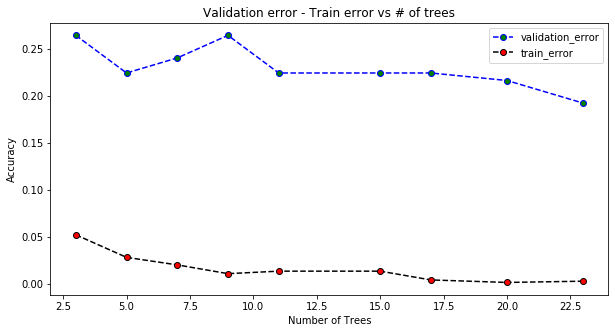

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline 
n_estimators=[3,5,7,9,11,15,17,20,23]

# Use the n_estimators values above.

#Draw the graph below. 
valid_error=[]
train_error=[]
for estimators in n_estimators:
    valid_error_model=RandomForestClassifier(n_estimators= estimators)
    valid_error_model.fit(X_train, y_train.values.ravel())
    predRF1=valid_error_model.predict(X_val)
    RFaccuracy1=accuracy_score(y_val, predRF1)
    valid_error.append(1-RFaccuracy1)

for estimators in n_estimators:
    train_error_model=RandomForestClassifier(n_estimators= estimators)
    train_error_model.fit(X_train, y_train.values.ravel())
    predRF2=train_error_model.predict(X_train)
    RFaccuracy2=accuracy_score(y_train, predRF2)
    train_error.append(1-RFaccuracy2)

plt.rcParams['figure.figsize']=(10,5)
plt.plot(n_estimators, valid_error,"go--", markerfacecolor="green",color="blue",label="validation_error")
plt.plot(n_estimators, train_error, "go--",markerfacecolor="red",color="black",label="train_error")
plt.legend()
plt.title("Validation error - Train error vs # of trees")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")

plt.show()

#You may see expected output at the end of cell.
#Notation: Do not focus the ratio's. It can be different on your case due to the "randomness".



In [0]:
# Find the Test Accuracy below !
random_forest = RandomForestClassifier(n_estimators= 23)
random_forest.fit(X_train, y_train.values.ravel())
predRF = random_forest.predict(X_val)

RFaccuracy = accuracy_score(y_val, predRF)

print(RFaccuracy)

0.768


# **Question 7** [10 pts]

After fitting, we can use "feature_importances_" attribute to get most important parameters of random forest model we created. Please find most three important parameters. You can look at the documentation.


In [0]:
# Solution
importances=model_rf.feature_importances_
importances.sort()
most_three_important=importances[-3:]
print(most_three_important)
#As long as , "feature_importances_" return the feature importances (the higher, the more important the feature). Those are the values of most three important parameters.



[0.1063049  0.11449033 0.1219722 ]
